In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
EnvironmentLoss = 4.2
measuredPower = -41 # For Thunderboard as a Static Beacon and the Starter Kit as a Sniffer device

def convertToDistance(inputRssiArray):
  return np.array([10**((measuredPower - rssi) / (10*EnvironmentLoss)) for rssi in inputRssiArray])

['./Results/3to0cm/0_Degree/B1.csv', './Results/3to0cm/90_Degree/B1.csv', './Results/3to0cm/180_Degree/B1.csv', './Results/3to0cm/270_Degree/B1.csv']


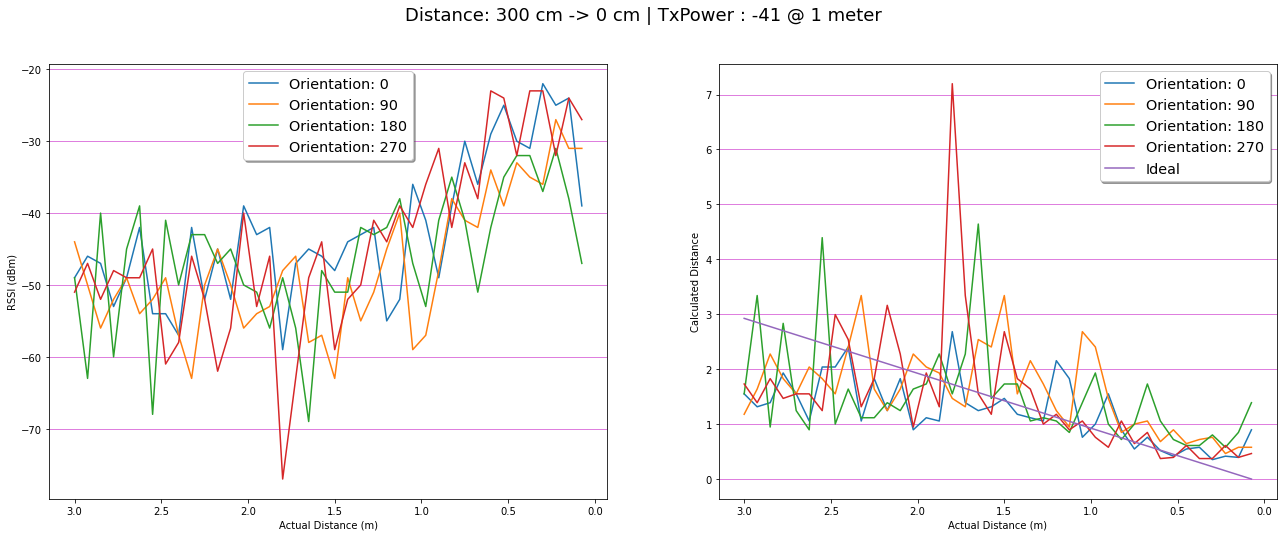

<Figure size 1800x576 with 0 Axes>

In [20]:

plt.rcParams["figure.figsize"] = (22, 8)

distance = '3to0'
orientation = [0,90,180,270]

resultsDir = "./Results/{}cm/{}_Degree" 
fileName1 = resultsDir + "/B1.csv"

fileNameList = [fileName1.format(distance,orientation[i]) for i in range(4)]

print(fileNameList)

colorList = ['#FFBA49', '#20A39E', '#EF5B5B', '#0000FF']


rssiDataList = [pd.read_csv(fileNameList[i]) for i in range(len(fileNameList)) ]
distanceDataList = [pd.DataFrame(convertToDistance(rssiDataList[i].to_numpy()), columns=['Orientation: {}'.format(orientation[i])]) for i in range(len(fileNameList)) ]
fiftyToZero = pd.DataFrame(np.arange(0, 3, 0.075), columns=['Ideal Condition'])
a = pd.DataFrame(np.arange(3, 0, -0.075))

# define number of rows and columns for subplots
nrow = 1
ncol = 2
fig, ax = plt.subplots(1, 2, sharex=True)
axes = ax.flatten()
plt.figure(figsize=(25, 8))  # change the figure size as needed
for i in range(len(fileNameList)):
  rssiDataList[i].rename(columns={'# rssi': 'Orientation: {}'.format(orientation[i])}, inplace=True)
  axes[0].plot(a.values.tolist(), rssiDataList[i].values.tolist(),
               label='Orientation: {}'.format(orientation[i]))
  # rssiDataList[i].plot(ax=axes[0], xticks=[i for i in range(0, 20, 2)],
  #                      grid=True, title="RSSI PLOT", fontsize=16, color=colorList[i])
  axes[1].plot(a.values.tolist(), distanceDataList[i].values.tolist(),
               label='Orientation: {}'.format(orientation[i]))
  # distanceDataList[i].plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=a,
  #                          grid=True, title="Calculated Distance PLOT", fontsize=16, color=colorList[i])
axes[1].plot(a.values.tolist(), fiftyToZero.values.tolist()[::-1], label='Ideal')
# fiftyToZero.plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=a,
#                  grid=True, title="Calculated Distance PLOT", fontsize=16, color='#000000')
legend = axes[0].legend(loc='upper center', shadow=True, fontsize='x-large')
legend = axes[1].legend(loc='upper right', shadow=True, fontsize='x-large')

axes[0].grid(which='both',axis='y', color='m', linestyle='-', linewidth=0.5)
axes[1].grid(which='both',axis='y', color='m', linestyle='-', linewidth=0.5)
axes[0].set_xlabel("Actual Distance (m)")
axes[0].xaxis.grid(True, which="minor")
axes[0].set_ylabel("RSSI (dBm)")
axes[1].set_xlabel("Actual Distance (m)")
axes[1].xaxis.grid(True, which="minor")
axes[1].yaxis.grid(True, which="minor")
axes[1].set_ylabel("Calculated Distance")
fig.gca().invert_xaxis()
fig.suptitle('Distance: 300 cm -> 0 cm | TxPower : -41 @ 1 meter', fontsize=18)
# fig.savefig(fileName1[:-3] + ".png", transparent=False)
plt.show()

['./Results/0to3cm/0_Degree/B1.csv', './Results/0to3cm/90_Degree/B1.csv', './Results/0to3cm/180_Degree/B1.csv', './Results/0to3cm/270_Degree/B1.csv']


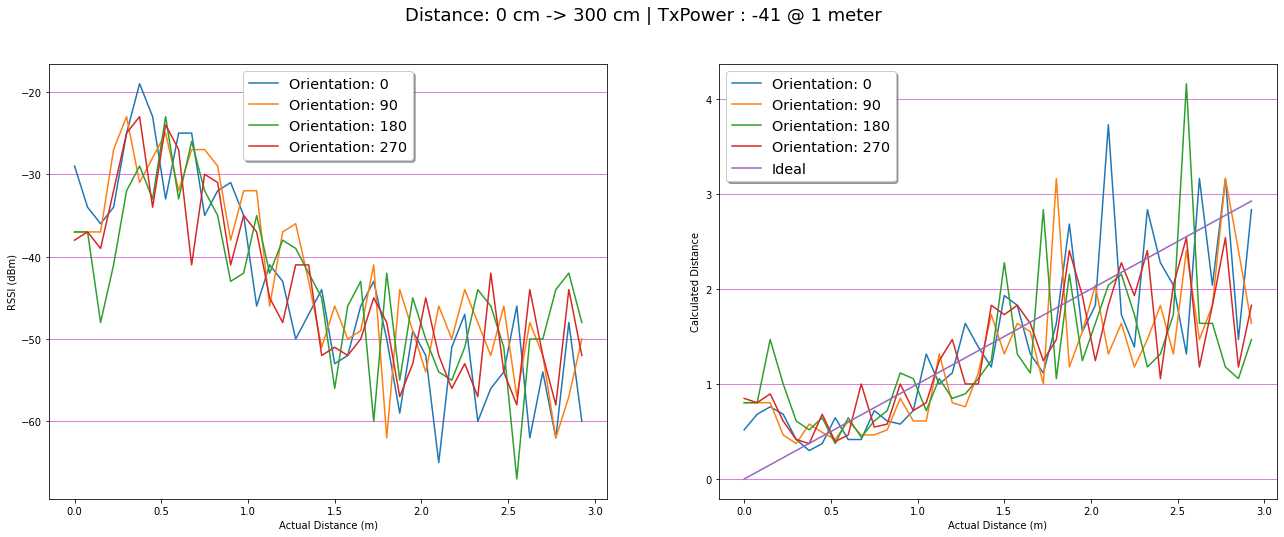

<Figure size 1800x576 with 0 Axes>

In [21]:
plt.rcParams["figure.figsize"] = (22, 8)

distance = '0to3'
orientation = [0, 90, 180, 270]

fileName1 = "./Results/{}cm/{}_Degree/B1.csv"

fileNameList = [fileName1.format(distance, orientation[i]) for i in range(4)]

print(fileNameList)

colorList = ['#FFBA49', '#20A39E', '#EF5B5B', '#0000FF']

# making data frame
rssiDataList = [pd.read_csv(fileNameList[i]) for i in range(len(fileNameList))]
distanceDataList = [pd.DataFrame(convertToDistance(rssiDataList[i].to_numpy()), columns=[
                                 'Orientation: {}'.format(orientation[i])]) for i in range(len(fileNameList))]
fiftyToZero = pd.DataFrame(np.arange(0, 3, 0.075), columns=['Ideal Condition'])
a = pd.DataFrame(np.arange(0, 3, 0.075))

# define number of rows and columns for subplots
nrow = 1
ncol = 2
fig, ax = plt.subplots(1, 2, sharex=True)
axes = ax.flatten()
plt.figure(figsize=(25, 8))  # change the figure size as needed
for i in range(len(fileNameList)):
  rssiDataList[i].rename(columns={'# rssi': 'Orientation: {}'.format(orientation[i])}, inplace=True)
  axes[0].plot(a.values.tolist(), rssiDataList[i].values.tolist(),
               label='Orientation: {}'.format(orientation[i]))
  # rssiDataList[i].plot(ax=axes[0], xticks=[i for i in range(0, 20, 2)],
  #                      grid=True, title="RSSI PLOT", fontsize=16, color=colorList[i])
  axes[1].plot(a.values.tolist(), distanceDataList[i].values.tolist(),
               label='Orientation: {}'.format(orientation[i]))
  # distanceDataList[i].plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=a,
  #                          grid=True, title="Calculated Distance PLOT", fontsize=16, color=colorList[i])
axes[1].plot(a.values.tolist(), fiftyToZero.values.tolist(), label='Ideal')
# fiftyToZero.plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=a,
#                  grid=True, title="Calculated Distance PLOT", fontsize=16, color='#000000')
legend = axes[0].legend(loc='upper center', shadow=True, fontsize='x-large')
legend = axes[1].legend(loc='upper left', shadow=True, fontsize='x-large')

axes[0].grid(which='both', axis='y', color='m', linestyle='-', linewidth=0.5)
axes[1].grid(which='both', axis='y', color='m', linestyle='-', linewidth=0.5)
axes[0].set_xlabel("Actual Distance (m)")
axes[0].xaxis.grid(True, which="minor")
axes[0].set_ylabel("RSSI (dBm)")
axes[1].set_xlabel("Actual Distance (m)")
axes[1].xaxis.grid(True, which="minor")
axes[1].yaxis.grid(True, which="minor")
axes[1].set_ylabel("Calculated Distance")
fig.suptitle('Distance: 0 cm -> 300 cm | TxPower : -41 @ 1 meter', fontsize=18)
# fig.savefig(fileName1[:-3] + ".png", transparent=False)
plt.show()


In [22]:
fileName = """.\Results\HolyIoT\onemeter\HI1.csv"""
distanceDataAtOneMeterForHolyIoT = pd.read_csv(fileName)
distanceDataAtOneMeterForHolyIoT = distanceDataAtOneMeterForHolyIoT.drop([4,5,6])
measuredPowerForHolyIoT = distanceDataAtOneMeterForHolyIoT.mean()

print("Measured Power For HolyIoT = {}".format(int(measuredPowerForHolyIoT)))



Measured Power For HolyIoT = -55


['./Results/HolyIoT/from3M/0_Degree/HI1.csv', './Results/HolyIoT/from3M/90_Degree/HI1.csv', './Results/HolyIoT/from3M/180_Degree/HI1.csv', './Results/HolyIoT/from3M/270_Degree/HI1.csv']


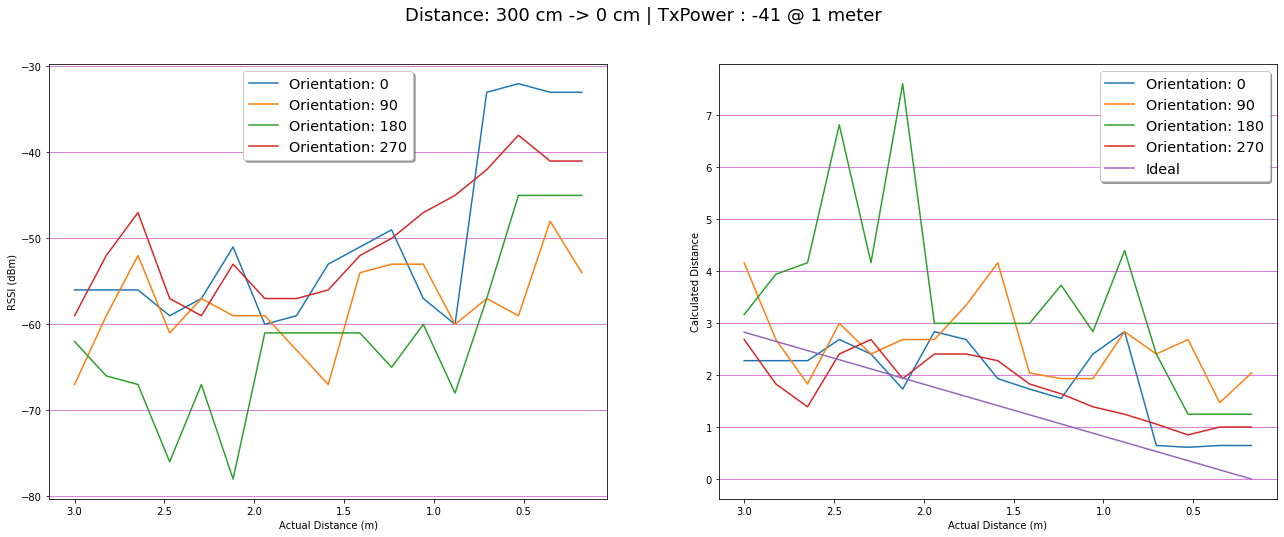

<Figure size 1800x576 with 0 Axes>

In [32]:

plt.rcParams["figure.figsize"] = (22, 8)

distance = 'from3M'
orientation = [0,90,180,270]

resultsDir = "./Results/HolyIoT/{}/{}_Degree" 
fileName = resultsDir + "/HI1.csv"

fileNameList = [fileName.format(distance,orientation[i]) for i in range(4)]

print(fileNameList)

colorList = ['#FFBA49', '#20A39E', '#EF5B5B', '#0000FF']


rssiDataList = [pd.read_csv(fileNameList[i]) for i in range(len(fileNameList)) ]
distanceDataList = [pd.DataFrame(convertToDistance(rssiDataList[i].to_numpy()), columns=['Orientation: {}'.format(orientation[i])]) for i in range(len(fileNameList)) ]

stepSize = 3/len(distanceDataList[0])

fiftyToZero = pd.DataFrame(np.arange(0, 3, stepSize), columns=['Ideal Condition'])
a = pd.DataFrame(np.arange(3, 0, -stepSize))

# define number of rows and columns for subplots
nrow = 1
ncol = 2
fig, ax = plt.subplots(1, 2, sharex=True)
axes = ax.flatten()
plt.figure(figsize=(25, 8))  # change the figure size as needed
for i in range(len(fileNameList)):
  rssiDataList[i].rename(columns={'# rssi': 'Orientation: {}'.format(orientation[i])}, inplace=True)
  axes[0].plot(a.values.tolist(), rssiDataList[i].values.tolist(),
               label='Orientation: {}'.format(orientation[i]))
  # rssiDataList[i].plot(ax=axes[0], xticks=[i for i in range(0, 20, 2)],
  #                      grid=True, title="RSSI PLOT", fontsize=16, color=colorList[i])
  axes[1].plot(a.values.tolist(), distanceDataList[i].values.tolist(),
               label='Orientation: {}'.format(orientation[i]))
  # distanceDataList[i].plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=a,
  #                          grid=True, title="Calculated Distance PLOT", fontsize=16, color=colorList[i])
axes[1].plot(a.values.tolist(), fiftyToZero.values.tolist()[::-1], label='Ideal')
# fiftyToZero.plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=a,
#                  grid=True, title="Calculated Distance PLOT", fontsize=16, color='#000000')
legend = axes[0].legend(loc='upper center', shadow=True, fontsize='x-large')
legend = axes[1].legend(loc='upper right', shadow=True, fontsize='x-large')

axes[0].grid(which='both',axis='y', color='m', linestyle='-', linewidth=0.5)
axes[1].grid(which='both',axis='y', color='m', linestyle='-', linewidth=0.5)
axes[0].set_xlabel("Actual Distance (m)")
axes[0].xaxis.grid(True, which="minor")
axes[0].set_ylabel("RSSI (dBm)")
axes[1].set_xlabel("Actual Distance (m)")
axes[1].xaxis.grid(True, which="minor")
axes[1].yaxis.grid(True, which="minor")
axes[1].set_ylabel("Calculated Distance")
fig.gca().invert_xaxis()
fig.suptitle('Distance: 300 cm -> 0 cm | TxPower : -55 @ 1 meter', fontsize=18)
# fig.savefig(fileName1[:-3] + ".png", transparent=False)
plt.show()